In [522]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import seaborn as sns

import re 


In [523]:
sns.set(font_scale=0.5, style="ticks")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})

In [524]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

### Citation:
    
https://www.kaggle.com/uknowabhishek/nyse-fundamentals-analysis-and-k-means-clustering



## 1. Data Extraction and Preprocessing

### 1.1 Loading

In [525]:
df = pd.read_csv("fundamentals.csv")
df.info()
df.describe()
security_df = pd.read_csv("securities.csv")
security_df.info()
security_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1781.000000,1781.000000,1482.000000,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,890.000000,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,1.608543e+09,1.235213e+10,186.771255,5.908020e+08,1.610769e+09,1.084239e+09,2.710102e+09,2.375333e+09,-3.849098e+07,9.134297e+07,8.533624e+09,3.929823e+09,46.763054,7.189010e+09,6.693903e+08,1.964418e+09,3.262712e+08,1.467160e+09,-9.679005e+08,1.789721e+08,8.477305e+09,2.321476e+10,4.166713e+08,4.243618e+07,5.155412e+08,5.273255e+07,3.257626e+09,-4.576406e+08,-2.717599e+09,1.705517e+09,2.198457e+08,1.687810e+09,1.748059e+09,3.242126e+09,2.184840e+08,2.268980e+09,18.177990,4.859874e+09,6.070513e+08,1.500814e+10,-6.207546e+08,4.844404e+08,-4.054141e+08,9.077173e+09,7.145331e+06,8.687623e+08,17.754632,59.644582,13.957889,146.952767,3.502724e+08,9.206811e+09,-7.652043e+08,3.980866e+09,3.054998e+09,1.123632e+09,5.570921e+10,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,514.274732,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,9.177636e+09,3.041419e+10,128.066801,2.666744e+09,4.548630e+09,2.188300e+09,6.145345e+09,5.720792e+09,1.626735e+08,7.244841e+08,1.928134e+10,7.926180e+09,25.438867,1.360778e+10,1.830140e+09,6.801774e+09,1.054266e+09,3.707554e+09,7.970010e+09,2.379559e+09,2.750685e+10,1.392505e+11,3.182589e+09,1.844666e+08,5.384720e+09,2.270117e+09,7.397563e+09,9.050889e+09,1.060344e+10,3.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [526]:
price_df = pd.read_csv("prices-split-adjusted.csv")
price_df.info()
price_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [527]:
df.columns = df.columns.str.strip().str.lower().str.replace(' \ ', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(':', '').str.replace('\'', '').str.replace('\,', '').str.replace('\.', '').str.replace('&', '_')
df.columns = df.columns.str.strip().str.replace('__', '_').str.replace('/', '_')
df.columns = df.columns.str.strip().str.replace('__', '_').str.replace('___', '_')
security_df.columns = security_df.columns.str.strip().str.lower().str.replace(' \ ', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(':', '').str.replace('\'', '').str.replace('\,', '').str.replace('\.', '').str.replace('&', '_')

In [528]:
df.columns
security_df.columns

Index(['unnamed_0', 'ticker_symbol', 'period_ending', 'accounts_payable',
       'accounts_receivable', 'addl_income_expense_items', 'after_tax_roe',
       'capital_expenditures', 'capital_surplus', 'cash_ratio',
       'cash_and_cash_equivalents', 'changes_in_inventories', 'common_stocks',
       'cost_of_revenue', 'current_ratio', 'deferred_asset_charges',
       'deferred_liability_charges', 'depreciation',
       'earnings_before_interest_and_tax', 'earnings_before_tax',
       'effect_of_exchange_rate',
       'equity_earnings_loss_unconsolidated_subsidiary', 'fixed_assets',
       'goodwill', 'gross_margin', 'gross_profit', 'income_tax',
       'intangible_assets', 'interest_expense', 'inventory', 'investments',
       'liabilities', 'long-term_debt', 'long-term_investments',
       'minority_interest', 'misc_stocks', 'net_borrowings', 'net_cash_flow',
       'net_cash_flow-operating', 'net_cash_flows-financing',
       'net_cash_flows-investing', 'net_income', 'net_income_adjus

Index(['ticker_symbol', 'security', 'sec_filings', 'gics_sector',
       'gics_sub_industry', 'address_of_headquarters', 'date_first_added',
       'cik'],
      dtype='object')

In [529]:
missing = df.isna().sum()/len(df)

print(missing)

unnamed_0                                             0.000000
ticker_symbol                                         0.000000
period_ending                                         0.000000
accounts_payable                                      0.000000
accounts_receivable                                   0.000000
addl_income_expense_items                             0.000000
after_tax_roe                                         0.000000
capital_expenditures                                  0.000000
capital_surplus                                       0.000000
cash_ratio                                            0.167883
cash_and_cash_equivalents                             0.000000
changes_in_inventories                                0.000000
common_stocks                                         0.000000
cost_of_revenue                                       0.000000
current_ratio                                         0.167883
deferred_asset_charges                                0

In [530]:
type(missing)
sort_missing = missing.sort_values()

pandas.core.series.Series

In [532]:
len(missing)

79

In [534]:
missing_display = sort_missing[70:79]

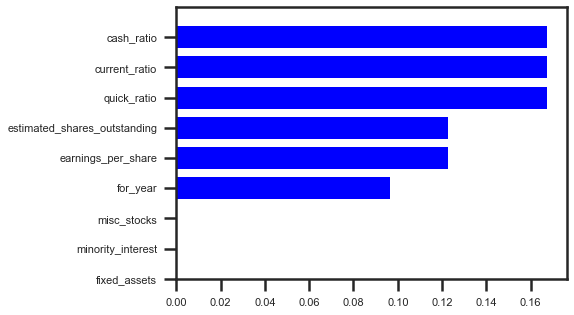

In [535]:
plt.figure(figsize=[7,5]);

plt.yticks(np.arange(9), missing_display.index.values);

plt.ylim(0,9);

plt.barh(np.arange(9), missing_display, color="blue");

In [536]:
df_fund = df.drop(['cash_ratio', 'current_ratio', 'quick_ratio', 'for_year'], axis=1)
df_fund = df_fund.dropna()

In [537]:
df_fund.reset_index(drop=True, inplace=True)

In [538]:
feature_dict = {}
for i in range(0, len(list(df_fund.columns))):
    feature_dict[i] = list(df_fund.columns)[i]

In [539]:
len(df_fund["ticker_symbol"])

1562

In [540]:
sector_column = []
industry_column = []
for key in list(df_fund["ticker_symbol"]):
    sector_column.append( security_df[security_df["ticker_symbol"] == key] ["gics_sector"].values[0]  )
    industry_column.append( security_df[security_df["ticker_symbol"] == key] ["gics_sub_industry"].values[0]  )

df_fund.insert(75, "sector", sector_column)

In [541]:
df_fund.insert(76, "industrty", industry_column)

In [542]:
df_fund.head()

,unnamed_0,ticker_symbol,period_ending,accounts_payable,accounts_receivable,addl_income_expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_and_cash_equivalents,changes_in_inventories,common_stocks,cost_of_revenue,deferred_asset_charges,deferred_liability_charges,depreciation,earnings_before_interest_and_tax,earnings_before_tax,effect_of_exchange_rate,equity_earnings_loss_unconsolidated_subsidiary,fixed_assets,goodwill,gross_margin,gross_profit,income_tax,intangible_assets,interest_expense,inventory,investments,liabilities,long-term_debt,long-term_investments,minority_interest,misc_stocks,net_borrowings,net_cash_flow,net_cash_flow-operating,net_cash_flows-financing,net_cash_flows-investing,net_income,net_income_adjustments,net_income_applicable_to_common_shareholders,net_income-cont_operations,net_receivables,non-recurring_items,operating_income,operating_margin,other_assets,other_current_assets,other_current_liabilities,other_equity,other_financing_activities,other_investing_activities,other_liabilities,other_operating_activities,other_operating_items,pre-tax_margin,pre-tax_roe,profit_margin,research_and_development,retained_earnings,sale_and_purchase_of_stock,sales_general_and_admin,short-term_debt__current_portion_of_long-term_debt,short-term_investments,total_assets,total_current_assets,total_current_liabilities,total_equity,total_liabilities,total_liabilities_equity,total_revenue,treasury_stock,earnings_per_share,estimated_shares_outstanding,sector,industrty
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,1.330000e+09,0.0,127000000.0,1.049900e+10,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,-5.60,3.350000e+08,Industrials,Airlines
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,2.175000e+09,0.0,5000000.0,1.101900e+10,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,-11.25,1.630222e+08,Industrials,Airlines
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,1.768000e+09,0.0,7000000.0,1.562000e+10,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+1

In [543]:
# Dropping 'UA' which was misssing in price_df
df_fund = df_fund[df_fund.ticker_symbol != 'UA']

### Build moving average after 10k dates

In [544]:
# Date builders
def put_month(d):
    dl = d.split("-")
    if dl[1] == '12':
        return int(dl[0])+1, 1
    return int(dl[0]), int(dl[1])
    
def get_dates(y,m,d):
    dl = d.split("-")
    if int(dl[0]) == y and int(dl[1]) == m:
        return d
    else:
        return "NO"

In [545]:
for i in df_fund[df_fund.ticker_symbol == 'AAL'].period_ending:
    print(i)

2012-12-31
2013-12-31
2014-12-31
2015-12-31


In [546]:
ticker_date_map = {}
count = 0
for tick in df_fund.ticker_symbol.unique():
    count+=1
    date_map = {}
    for i in df_fund[df_fund.ticker_symbol == tick].period_ending:
        y, m = put_month(i)
        date_list = []
        for j in price_df[price_df["symbol"] == tick].date:
            point = get_dates(y,m,j)
            if point!='NO':
                date_list.append(point)
        date_map[i] = date_list
    ticker_date_map[tick] = date_map
    if count % 50 == 0:
        print(count)

50
100
150


KeyboardInterrupt: 

In [ ]:
ticker_date_map

In [ ]:
float(price_df[ (price_df["symbol"]== 'AAL') & (price_df["date"]=='2013-01-02') ].close)

In [ ]:
# Calculating the mean value
mv_avg = []
c = 0
for _, row in df_fund.iterrows():
    c+=1
    mv_sum = -0.0001
    count = 0
    t = row['ticker_symbol']
    d = row['period_ending']
    dlist = ticker_date_map[t][d]
    for ds in dlist:
        mv_sum += float(price_df[ (price_df["symbol"]== t) & (price_df["date"]==ds) ].close)
        count +=1
    mv_avg.append(mv_sum/count)
    if c % 25 == 0:
        print(c)
#     if c == 100:
#         break

# for tick in ticker_date_map.keys():
    
#     mv_avg = -0.01

In [ ]:
mv_avg

In [ ]:
df_fund.insert(2, "mv_avg", mv_avg)

In [ ]:
# Calcualte the market cap:
df_fund["mkt_cap"] = df_fund.estimated_shares_outstanding*df_fund.mv_avg


In [ ]:
# Save the progres
df_fund.to_csv("processed_fund.csv")

## 2. Regression Model

Earnings.Before.Interest.and.Tax, Net.Income, Retained.Earnings

In [ ]:
EDA_fst_feat = [
# "accounts_receivable",
# "accounts_payable",
# "long-term_debt",
"mkt_cap",
"net_cash_flow-operating",
"net_cash_flows-investing",
"net_cash_flows-financing",
"earnings_before_interest_and_tax",
"net_income",
"operating_income",
"retained_earnings",
"interest_expense",
"income_tax",
"research_and_development",
"depreciation",
'capital_expenditures']

In [ ]:
EDAX = df_fund[df_fund.sector == 'Information Technology'][EDA_fst_feat].corr()

In [ ]:
sns.heatmap(EDAX)

In [264]:
# sns.pairplot(EDAX)

In [171]:
df_fund.columns

Index(['unnamed_0', 'ticker_symbol', 'mv_avg', 'period_ending',
       'accounts_payable', 'accounts_receivable', 'addl_income_expense_items',
       'after_tax_roe', 'capital_expenditures', 'capital_surplus',
       'cash_and_cash_equivalents', 'changes_in_inventories', 'common_stocks',
       'cost_of_revenue', 'deferred_asset_charges',
       'deferred_liability_charges', 'depreciation',
       'earnings_before_interest_and_tax', 'earnings_before_tax',
       'effect_of_exchange_rate',
       'equity_earnings_loss_unconsolidated_subsidiary', 'fixed_assets',
       'goodwill', 'gross_margin', 'gross_profit', 'income_tax',
       'intangible_assets', 'interest_expense', 'inventory', 'investments',
       'liabilities', 'long-term_debt', 'long-term_investments',
       'minority_interest', 'misc_stocks', 'net_borrowings', 'net_cash_flow',
       'net_cash_flow-operating', 'net_cash_flows-financing',
       'net_cash_flows-investing', 'net_income', 'net_income_adjustments',
       'net_

In [290]:
fst_feat = [
# "mkt_cap",
"net_cash_flow-operating",
"net_cash_flows-investing",
"net_cash_flows-financing",
"earnings_before_interest_and_tax",
"net_income",
"operating_income",
"retained_earnings",
"interest_expense",
"income_tax",
"research_and_development",
"depreciation",
'capital_expenditures']

In [281]:
# Plus year
def get_year(d):
    x = d.split("-")
    if x[1] == '12':
        return int(x[0]) + 1
    return int(x[0])

In [284]:
years = []
for i in list(df_fund.period_ending):
    years.append(get_year(i))

In [285]:
years

[2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2013,
 2014,
 2015,
 2016,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2013,
 2014,
 2015,
 2016,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2014,
 2015,
 2016,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2015,
 2016,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2014,
 2015,
 2016,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,
 2014,
 2015,
 2016,
 2013,

In [287]:
df_fund.insert(2, "nxt_yr", years)

In [288]:
df_fund.head()

,unnamed_0,ticker_symbol,nxt_yr,mv_avg,period_ending,accounts_payable,accounts_receivable,addl_income_expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_and_cash_equivalents,changes_in_inventories,common_stocks,cost_of_revenue,deferred_asset_charges,deferred_liability_charges,depreciation,earnings_before_interest_and_tax,earnings_before_tax,effect_of_exchange_rate,equity_earnings_loss_unconsolidated_subsidiary,fixed_assets,goodwill,gross_margin,gross_profit,income_tax,intangible_assets,interest_expense,inventory,investments,liabilities,long-term_debt,long-term_investments,minority_interest,misc_stocks,net_borrowings,net_cash_flow,net_cash_flow-operating,net_cash_flows-financing,net_cash_flows-investing,net_income,net_income_adjustments,net_income_applicable_to_common_shareholders,net_income-cont_operations,net_receivables,non-recurring_items,operating_income,operating_margin,other_assets,other_current_assets,other_current_liabilities,other_equity,other_financing_activities,other_investing_activities,other_liabilities,other_operating_activities,other_operating_items,pre-tax_margin,pre-tax_roe,profit_margin,research_and_development,retained_earnings,sale_and_purchase_of_stock,sales_general_and_admin,short-term_debt__current_portion_of_long-term_debt,short-term_investments,total_assets,total_current_assets,total_current_liabilities,total_equity,total_liabilities,total_liabilities_equity,total_revenue,treasury_stock,earnings_per_share,estimated_shares_outstanding,sector,industrty,mkt_cap
0,0,AAL,2013,14.644757,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,1.330000e+09,0.0,127000000.0,1.049900e+10,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,-5.60,3.350000e+08,Industrials,Airlines,4.905994e+09
1,1,AAL,2014,29.716186,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,2.175000e+09,0.0,5000000.0,1.101900e+10,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,-11.25,1.630222e+08,Industrials,Airlines,4.844399e+09
2,2,AAL,2015,52.295995,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,1.768000e+09,0.0,7000000.0,1.562000e+10,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e

In [291]:
X_train = df_fund[df_fund.nxt_yr < 2016][fst_feat]
y_train = df_fund[df_fund.nxt_yr < 2016].mkt_cap

X_test = df_fund[df_fund.nxt_yr == 2016][fst_feat]
y_test = df_fund[df_fund.nxt_yr == 2016].mkt_cap

#### Linear Regression

In [297]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [372]:
model = LinearRegression(normalize= True)
model.fit(X_train,y_train)
# model.r2_score(X_train,y_train)

LinearRegression(normalize=True)

In [373]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [374]:
r2_score(y_pred_test, y_test)

0.6668881158021711

In [375]:
r2_score(y_pred_train, y_train)

0.6801851819455427

In [418]:
for i in model.coef_:
    print (i)

-0.07660418156135847
-0.3743463517823042
-0.5145587503775916
2.277693520661655
4.072271081282472
0.44383465153274604
0.03981033096452181
2.159797382435228
1.3875313705736139
8.640745939196925
4.159812969809085
1.099961496277157


#### Lasso

In [413]:
l1_model = Lasso(alpha=10, normalize= True)
l1_model.fit(X_train,y_train)

Lasso(alpha=10, normalize=True)

In [414]:
l1_y_pred_test = l1_model.predict(X_test)
l1_y_pred_train = l1_model.predict(X_train)

In [415]:
r2_score(l1_y_pred_test, y_test)

0.6668880968849191

In [416]:
r2_score(l1_y_pred_train, y_train)

0.6801851912562009

In [419]:
for i in l1_model.coef_:
    print(i)

-0.07660540957392317
-0.37434709354140977
-0.5145598361194194
2.277724188896688
4.072249602992532
0.4438313839542251
0.03981043283074023
2.159765458402435
1.3874914071043476
8.640745849390226
4.159807238073444
1.0999590420586554


#### Ridge

In [403]:
l2_model = Ridge(alpha=.5, normalize= True)
l2_model.fit(X_train,y_train)

Ridge(alpha=0.5, normalize=True)

In [404]:
l2_y_pred_test = l2_model.predict(X_test)
l2_y_pred_train = l2_model.predict(X_train)

In [405]:
r2_score(l2_y_pred_test, y_test)

0.5831273122811214

In [406]:
r2_score(l2_y_pred_train, y_train)

0.5975250734086461

In [420]:
for i in l2_model.coef_:
    print(i)

0.6095756518462656
-0.21657332968108173
-0.16109530010105283
1.1309806021308837
2.0915937088108274
1.3543741272796073
0.14230906383711459
2.328191625270647
2.4765599548487023
7.239450740464803
2.179523168001225
-0.27951937631998525


In [386]:
alphas=[0.01, 0.1, 1.0, 10.0]

In [357]:
model.score(X_test,y_test)

0.7448086597614535

### By Sector

In [422]:
indlist = list(df_fund.sector.unique())
indlist

['Industrials',
 'Consumer Discretionary',
 'Information Technology',
 'Health Care',
 'Consumer Staples',
 'Utilities',
 'Financials',
 'Real Estate',
 'Materials',
 'Energy',
 'Telecommunications Services']

In [454]:
ind_coeff = []
ind_r2_score_test = []
ind_r2_score_train = []
for ind in indlist:
#     model = LinearRegression(normalize= True)
    model = Lasso(alpha = 0.05, normalize= True)

    X_train = df_fund[(df_fund.sector == ind) & (df_fund.nxt_yr < 2016)][fst_feat]
    y_train = df_fund[(df_fund.sector == ind) & (df_fund.nxt_yr < 2016)].mkt_cap

    X_test = df_fund[(df_fund.sector == ind) & (df_fund.nxt_yr == 2016)][fst_feat]
    y_test = df_fund[(df_fund.sector == ind) & (df_fund.nxt_yr == 2016)].mkt_cap
    model.fit(X_train,y_train)
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    ind_r2_score_test.append(r2_score(y_pred_test, y_test))
    ind_r2_score_train.append(r2_score(y_pred_train, y_train))
    ind_coeff.append(model.coef_)

Lasso(alpha=0.05, normalize=True)

Lasso(alpha=0.05, normalize=True)

Lasso(alpha=0.05, normalize=True)

Lasso(alpha=0.05, normalize=True)

Lasso(alpha=0.05, normalize=True)

Lasso(alpha=0.05, normalize=True)

Lasso(alpha=0.05, normalize=True)

Lasso(alpha=0.05, normalize=True)

Lasso(alpha=0.05, normalize=True)

Lasso(alpha=0.05, normalize=True)

Lasso(alpha=0.05, normalize=True)

In [455]:
ind_r2_score_test

[0.45666019905269895,
 0.48909767861160514,
 0.6534120943570135,
 0.9078295096273526,
 0.8983043968775621,
 0.1473593977716613,
 0.9357695634856328,
 0.6379138259261761,
 0.7028290643981763,
 0.9089528991483072,
 0.8975089870438788]

In [451]:
ind_r2_score_train

[0.3221242069627268,
 0.6689627003830739,
 0.8073534647380743,
 0.8967086408262404,
 0.9675345255698777,
 -2.0001086093472753,
 0.9160633778097993,
 0.0834160863785588,
 0.7845337046751883,
 0.9857041384511365,
 0.9878583184332344]

In [426]:
ind_testsize = []
ind_trainsize = []
for ind in indlist:
#     model = LinearRegression(normalize= True)

    ind_trainsize.append(len(df_fund[(df_fund.sector == ind) & (df_fund.nxt_yr < 2016)][fst_feat]))
    ind_testsize.append(len(df_fund[(df_fund.sector == ind) & (df_fund.nxt_yr == 2016)][fst_feat]))

In [430]:
for i in ind_testsize:
        print(i)

62
69
58
47
26
22
48
26
24
30
5


In [429]:
for i in ind_trainsize:
    print(i)

157
190
158
125
73
66
135
73
65
84
15


In [223]:
X_ener = df_fund[df_fund.sector == 'Financials'][fst_feat]
y_ener = df_fund[df_fund.sector == 'Financials']["mkt_cap"]
ener_model = LinearRegression()
ener_model.fit(X_ener,y_ener)
ener_model.score(X_ener,y_ener)

LinearRegression()

0.9349422077332511

In [224]:
ener_model.coef_

array([ 0.        ,  6.09945776, -1.67629846,  0.57531768, -0.12352126,
        0.35212732, -2.80323216,  4.17045822, 18.29797336, -0.77090898,
       -0.75921355, -0.78074639])

### Trading Strategy

In [457]:
select_sec =["Health Care"
"Consumer Staples"
"Financials"
"Energy"]



In [464]:
df_fund.sector.unique()

array(['Industrials', 'Consumer Discretionary', 'Information Technology',
       'Health Care', 'Consumer Staples', 'Utilities', 'Financials',
       'Real Estate', 'Materials', 'Energy',
       'Telecommunications Services'], dtype=object)

In [466]:
df_fund.head()

,unnamed_0,ticker_symbol,nxt_yr,mv_avg,period_ending,accounts_payable,accounts_receivable,addl_income_expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_and_cash_equivalents,changes_in_inventories,common_stocks,cost_of_revenue,deferred_asset_charges,deferred_liability_charges,depreciation,earnings_before_interest_and_tax,earnings_before_tax,effect_of_exchange_rate,equity_earnings_loss_unconsolidated_subsidiary,fixed_assets,goodwill,gross_margin,gross_profit,income_tax,intangible_assets,interest_expense,inventory,investments,liabilities,long-term_debt,long-term_investments,minority_interest,misc_stocks,net_borrowings,net_cash_flow,net_cash_flow-operating,net_cash_flows-financing,net_cash_flows-investing,net_income,net_income_adjustments,net_income_applicable_to_common_shareholders,net_income-cont_operations,net_receivables,non-recurring_items,operating_income,operating_margin,other_assets,other_current_assets,other_current_liabilities,other_equity,other_financing_activities,other_investing_activities,other_liabilities,other_operating_activities,other_operating_items,pre-tax_margin,pre-tax_roe,profit_margin,research_and_development,retained_earnings,sale_and_purchase_of_stock,sales_general_and_admin,short-term_debt__current_portion_of_long-term_debt,short-term_investments,total_assets,total_current_assets,total_current_liabilities,total_equity,total_liabilities,total_liabilities_equity,total_revenue,treasury_stock,earnings_per_share,estimated_shares_outstanding,sector,industrty,mkt_cap
0,0,AAL,2013,14.644757,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,1.330000e+09,0.0,127000000.0,1.049900e+10,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,-5.60,3.350000e+08,Industrials,Airlines,4.905994e+09
1,1,AAL,2014,29.716186,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,2.175000e+09,0.0,5000000.0,1.101900e+10,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,-11.25,1.630222e+08,Industrials,Airlines,4.844399e+09
2,2,AAL,2015,52.295995,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,1.768000e+09,0.0,7000000.0,1.562000e+10,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e

In [497]:
select_feat = [
"net_cash_flow-operating",
"net_cash_flows-investing",
"net_cash_flows-financing",
"earnings_before_interest_and_tax",
"net_income",
"operating_income",
"retained_earnings",
"interest_expense",
"income_tax",
"research_and_development",
"depreciation",
'capital_expenditures',
"ticker_symbol",
"period_ending",
"estimated_shares_outstanding"]

In [498]:
fst_feat = [
# "mkt_cap",
"net_cash_flow-operating",
"net_cash_flows-investing",
"net_cash_flows-financing",
"earnings_before_interest_and_tax",
"net_income",
"operating_income",
"retained_earnings",
"interest_expense",
"income_tax",
"research_and_development",
"depreciation",
'capital_expenditures']

In [499]:
# ind_coeff = []
# ind_r2_score_test = []
# ind_r2_score_train = []
# for ind in indlist:

ind = "Financials"
model = LinearRegression(normalize= True)
#     model = Lasso(alpha = 0.05, normalize= True)

X_train = df_fund[(df_fund.sector == ind) & (df_fund.nxt_yr < 2016)][fst_feat]
y_train = df_fund[(df_fund.sector == ind) & (df_fund.nxt_yr < 2016)].mkt_cap

# select_feat = fst_feat.append("ticker_symbol")
X_test = df_fund[(df_fund.sector == ind) & (df_fund.nxt_yr == 2016)][select_feat]
y_test = df_fund[(df_fund.sector == ind) & (df_fund.nxt_yr == 2016)].mkt_cap

model.fit(X_train,y_train)

y_pred_test = model.predict(X_test[fst_feat])
y_pred_train = model.predict(X_train)

# ind_r2_score_test.append(r2_score(y_pred_test, y_test))
# ind_r2_score_train.append(r2_score(y_pred_train, y_train))
# ind_coeff.append(model.coef_)

LinearRegression(normalize=True)

In [500]:
len(y_pred_test)

48

In [501]:
X_test.insert(2, "pred_mean_cap", y_pred_test)

In [502]:
next_cap = []
c = 0
for _, row in X_test.iterrows():
    c+=1
    mv_sum = -0.0001
    count = 0
    t = row['ticker_symbol']
    d = row['period_ending']
    dlist = ticker_date_map[t][d]
    ds = dlist[0]
#     for ds in dlist:
    mv_sum += float(price_df[ (price_df["symbol"]== t) & (price_df["date"]==ds) ].close)
    count +=1
    next_cap.append(mv_sum/count)
    if c % 25 == 0:
        print(c)

25


In [503]:
X_test.insert(3, "next_cap", next_cap)

In [506]:
X_test["decide_cap"] = X_test.next_cap * X_test.estimated_shares_outstanding

In [513]:
X_test["include"] = X_test.decide_cap < X_test.pred_mean_cap*0.8

In [515]:
X_pick = X_test[X_test["include"]]

In [516]:
X_pick

,net_cash_flow-operating,net_cash_flows-investing,pred_mean_cap,next_cap,net_cash_flows-financing,earnings_before_interest_and_tax,net_income,operating_income,retained_earnings,interest_expense,income_tax,research_and_development,depreciation,capital_expenditures,ticker_symbol,period_ending,estimated_shares_outstanding,decide_cap,include
51,6.776000e+09,-4.897000e+09,3.338772e+10,59.179900,-2.187000e+09,4.151000e+09,2.533000e+09,3.862000e+09,2.400700e+10,2.890000e+08,1.329000e+09,0.0,0.000000e+00,0.000000e+00,AFL,2015-12-31,4.307823e+08,2.549365e+10,True
61,2.545720e+08,2.642930e+08,7.982910e+09,78.519897,-4.871270e+08,2.562970e+08,1.415550e+08,2.011810e+08,4.856674e+09,5.511600e+07,5.962600e+07,0.0,1.241170e+08,-1.148960e+08,AIZ,2015-12-31,6.805529e+07,5.343694e+09,True
80,3.616000e+09,7.420000e+08,3.970991e+10,60.669898,-4.520000e+09,3.574000e+09,2.171000e+09,3.279000e+09,3.941300e+10,2.920000e+08,1.111000e+09,0.0,3.710000e+08,-3.030000e+08,ALL,2015-12-31,4.240234e+08,2.572546e+10,True
97,1.204800e+09,-3.245000e+08,1.288750e+10,155.989905,-8.541000e+08,1.139200e+09,5.160000e+08,7.864000e+08,2.679300e+09,4.860000e+07,2.569000e+08,0.0,1.423000e+08,-3.820000e+07,AMG,2015-12-31,5.437302e+07,8.481643e+09,True
228,3.973700e+10,1.488300e+10,2.081109e+11,51.129901,-6.477300e+10,3.674700e+10,1.724200e+10,2.414400e+10,1.338410e+11,1.192100e+10,7.440000e+09,0.0,3.697000e+09,-3.198000e+09,C,2015-12-31,3.187061e+09,1.629541e+11,True
300,8.620000e+08,-3.255000e+09,1.244344e+10,41.429900,2.469000e+09,8.020000e+08,5.210000e+08,0.000000e+00,7.084000e+09,5.200000e+07,2.290000e+08,0.0,1.240000e+08,-1.190000e+08,CMA,2015-12-31,1.778157e+08,7.366887e+09,True
325,1.012700e+10,-2.972600e+10,5.237161e+10,70.739898,2.038000e+10,6.415000e+09,4.050000e+09,0.000000e+00,2.704500e+10,5.340000e+08,1.869000e+09,0.0,2.100000e+09,-5.320000e+08,COF,2015-12-31,5.664336e+08,4.006945e+10,True
398,3.854000e+09,-2.868000e+09,3.152501e+10,52.709899,1.302000e+09,4.252000e+09,2.297000e+09,0.000000e+00,1.325000e+10,6.400000e+08,1.315000e+09,0.0,-4.100000e+07,-1.680000e+08,DFS,2015-12-31,4.468872e+08,2.355538e+10,True
870,-7.617550e+08,7.811650e+08,1.324998e+10,17.019900,-6.519830e+08,1.265417e+09,2.521110e+08,-4.122890e+08,4.612982e+09,9.088810e+08,1.099470e+08,0.0,1.720730e+08,-2.958940e+08,LUK,2015-12-31,3.406905e+08,5.798519e+09,True
983,1.742408e+09,7.714282e+09,2.230558e+10,117.479903,-9.462007e+09,1.929135e+09,1.079667e+09,0.000000e+00,8.430502e+09,2.544430e+08,5.950250e+08,0.0,1.753490e+08,-8.193600e+07,MTB,2015-12-31,1.495384e+08,1.756775e+10,True


**utility/try out code:**

In [144]:
df_fund.estimated_shares_outstanding.iloc[0]

335000000.0

In [136]:
check_size = 0
for i in ticker_date_map.keys():
    check_size += len(ticker_date_map[i])
print(check_size)

1558


In [139]:
len(df_fund)

1558

In [84]:
put_month(df_fund.iloc[0]["period_ending"])

(2013, 1)

In [56]:
df_fund[:1]["period_ending"]

0    2012-12-31
Name: period_ending, dtype: object

In [57]:
trythis = price_df[price_df["symbol"] == "AAL" ]

In [77]:
# checking funda ticker availability in prices
anyt = []
for i in df_fund["ticker_symbol"].unique():
    if i not in price_df["symbol"].unique():
        anyt.append(i)
anyt

In [79]:
price_df[price_df["symbol"] == 'AAL']

,date,symbol,open,close,low,high,volume
252,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0
719,2010-01-05,AAL,4.790000,5.310000,4.710000,5.370000,25212000.0
1187,2010-01-06,AAL,5.190000,5.090000,5.000000,5.380000,16597900.0
1655,2010-01-07,AAL,5.060000,5.240000,5.050000,5.430000,14033400.0
2123,2010-01-08,AAL,5.270000,5.140000,5.060000,5.430000,12760000.0
...,...,...,...,...,...,...,...
848765,2016-12-23,AAL,48.610001,48.480000,48.290001,48.840000,2914800.0
849265,2016-12-27,AAL,48.290001,48.610001,48.139999,48.919998,2797800.0
849765,2016-12-28,AAL,48.730000,47.669998,47.610001,48.830002,4153600.0
850265,2016-12-29,AAL,47.799999,47.250000,46.959999,48.000000,3709300.0


In [66]:
trythis.iloc[0]["date"].split("-")

['2010', '01', '04']

In [50]:
len(industry_column)

1562

In [51]:
price_df[price_df["symbol"] == "AAPL"]

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
1657,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2125,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0
...,...,...,...,...,...,...,...
848767,2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0
849267,2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0
849767,2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0
850267,2016-12-29,AAPL,116.449997,116.730003,116.400002,117.110001,15039500.0


In [ ]:
security_df

In [ ]:
type(price_df["date"][0])

## [Archived] 1. Data Extraction and preprocessing

In [ ]:
df.head()

In [ ]:
df.columns